# Assignment_4 DT

In [33]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

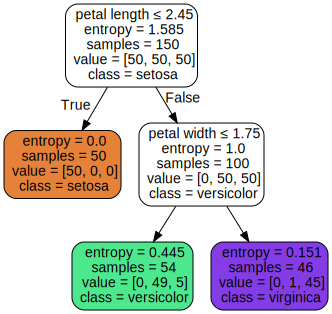

In [35]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(tree_clf, feature_names=['petal length', 'petal width'], class_names=iris.target_names, filled=True, rounded=True, special_characters=True, out_file=None)
Source(dot_data)

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

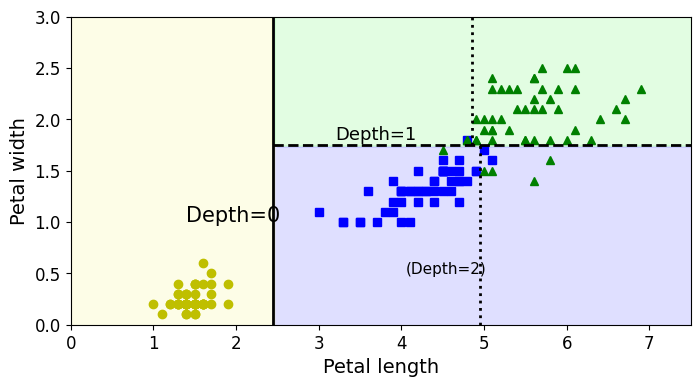

In [37]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. We observe that the output entropy at 1st block is `1.585` then it decreases in the second branch to `0` which means that it's **pure** and the other branch is less than the root it is `1` as it's a **mixture** between the other 2 classes

2. with `max_depth = 1` the model goes **underfitting** but with `max_depth = 2` it seems to be a **little generalized and have better performance whish is kinda acceptable**, at `max_depth = 10` the model goes to **overfitting**. So we conclude that with decreasing the depth our prediction and test will be very bad and when increasing the depth too much the model train will be excellent unlike model test will be such a mess so it's better to choose a depth where the train and test accuracy is acceptable aka: Not very small depth and not very large depth just convinent value

In [38]:
####### YOUR CODE HERE
tree_clf1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf1.fit(X, y)

tree_clf10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf10.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

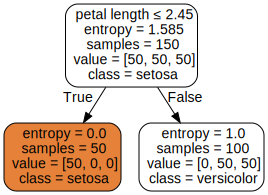

In [39]:
dot_data1 = export_graphviz(tree_clf1, feature_names=['petal length', 'petal width'], class_names=iris.target_names, filled=True, rounded=True, special_characters=True, out_file=None)
Source(dot_data1)

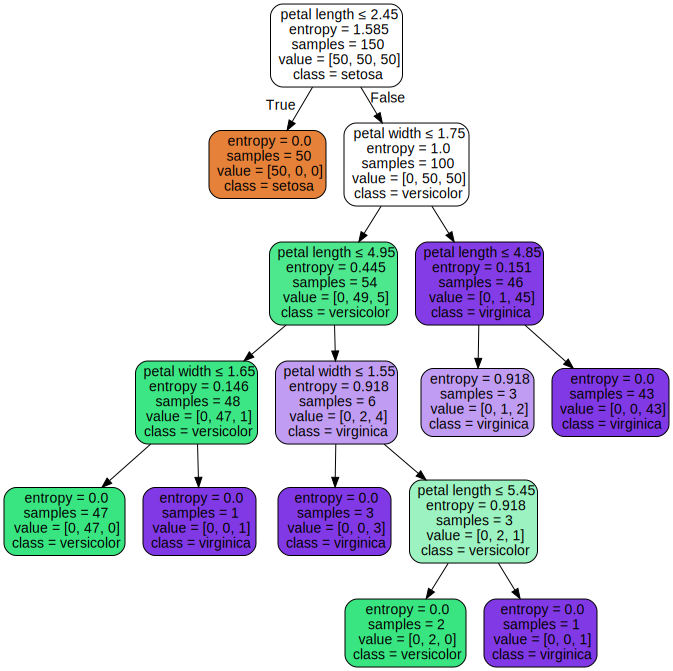

In [40]:
dot_data10 = export_graphviz(tree_clf10, feature_names=['petal length', 'petal width'], class_names=iris.target_names, filled=True, rounded=True, special_characters=True, out_file=None)
Source(dot_data10)

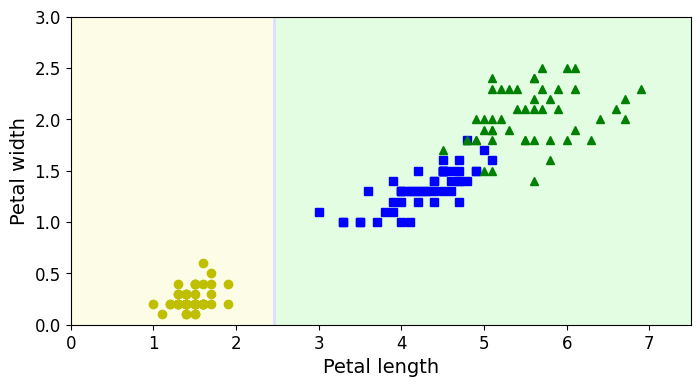

In [41]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf1, X, y)

plt.show()

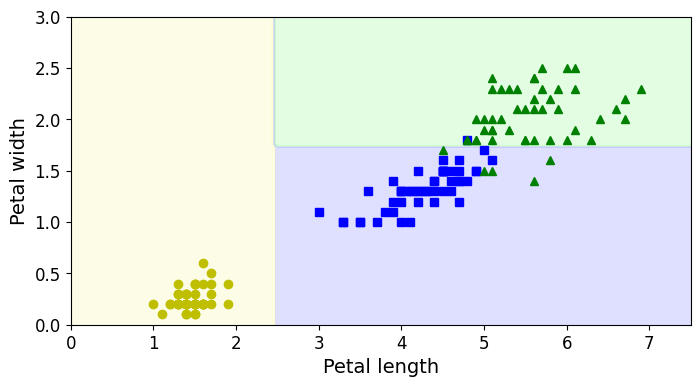

In [42]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.show()

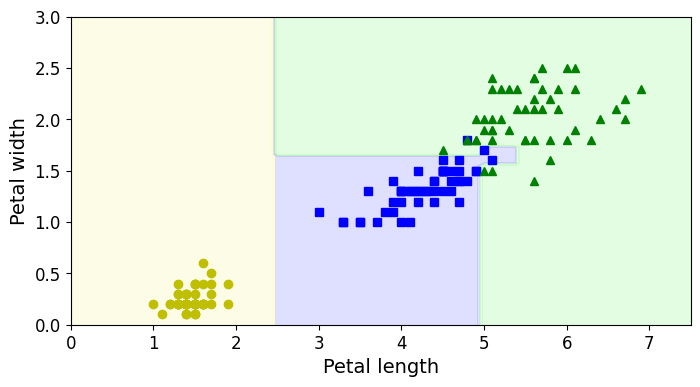

In [43]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf10, X, y)

plt.show()

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. 

In [44]:
######### Your code for (2.)
x = [[5, 1.5]]
def get_prob(x):
  x = np.array(x, dtype=np.float32)
  classes_pred = tree_clf.tree_.predict(x)
  tot_pred = sum(classes_pred[0])
  return classes_pred/tot_pred
classes_prob = get_prob(x)
print("Classes probabilities using my implementation: ",classes_prob[0])

pred_prob_method = tree_clf.predict_proba(x)
print("Classes probabilities using predict_proba: ",pred_prob_method[0])

Classes probabilities using my implementation:  [0.         0.90740741 0.09259259]
Classes probabilities using predict_proba:  [0.         0.90740741 0.09259259]


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

In [45]:
##### YOUR CODE HERE
DT_2 = DecisionTreeClassifier(max_depth = 2, random_state = 42, criterion = 'entropy')
X = iris.data[:,2:]
y = iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# DT_2.fit(X_train, y_train)
DT_2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

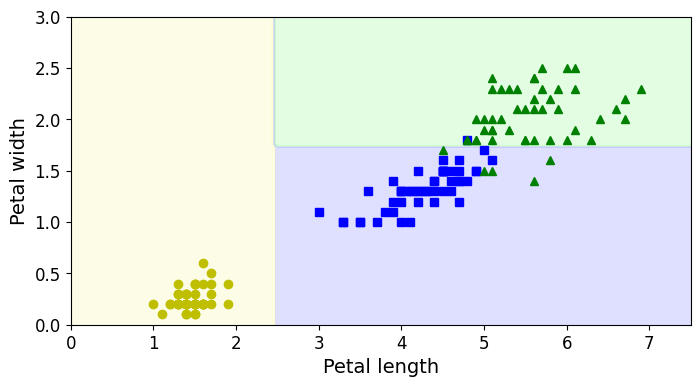

In [46]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(DT_2, X, y)

plt.show()

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size = 0.2)
DT_2.score(X, y)*100
# DT_2.score(X_test, y_test)*100

96.0

The following cell rotates the data by angle 20

In [48]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

In [49]:
##### YOUR CODE HERE
from sklearn.model_selection import train_test_split

DT_r_2 = DecisionTreeClassifier(max_depth = 2, random_state = 42, criterion = 'entropy')
X = iris.data[:,2:]
y = iris.target
# X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, y, test_size = 0.2)
# DT_r_2.fit(X_train_r, y_train_r)
DT_r_2.fit(Xr, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

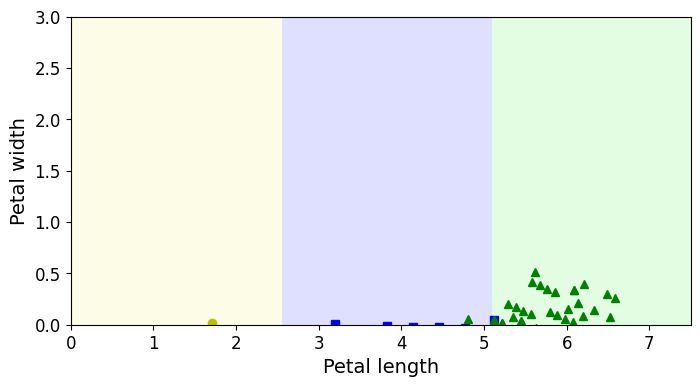

In [50]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(DT_r_2, Xr, y)

plt.show()

In [51]:
# DT_r_2.score(X_test_r, y_test_r)*100
DT_r_2.score(Xr, y)*100

97.33333333333334

**Comment** 

We can observe that the rotation improved the decision boundaries so it made the data dependent on `Petal length` more than it's dependance on `Petal width` 

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [52]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

In [53]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
LReg = LogisticRegression(random_state=42)
LReg.fit(X, y)

LogisticRegression(random_state=42)

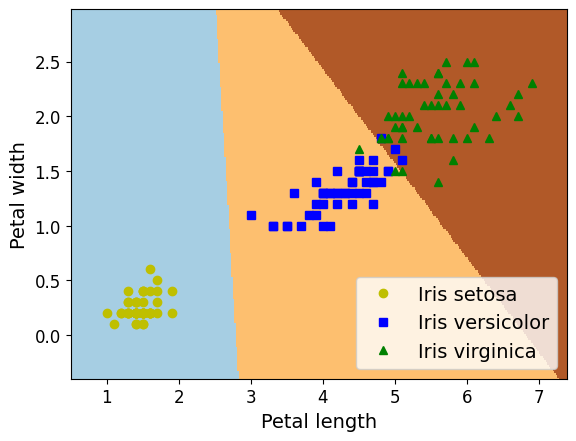

In [54]:
plot_logistic_regression(LReg, X, y, [])

In [55]:
LReg.score(X, y)*100

96.66666666666667

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

In [56]:
###### YOUR CODE HERE
LReg_r = LogisticRegression(random_state=42)
# LReg_r.fit(X_train_r, y_train_r)
LReg_r.fit(Xr, y)

LogisticRegression(random_state=42)

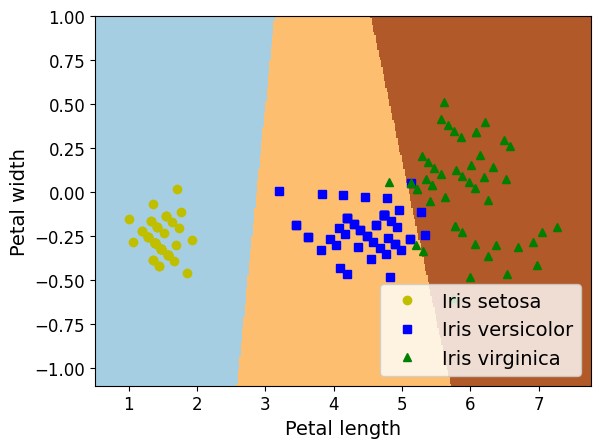

In [57]:
plot_logistic_regression(LReg_r, Xr, y, [])

In [58]:
LReg_r.score(Xr, y)*100

96.66666666666667

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. In **DecisionTree's** score on original data is `96%` and on the rotated data it's `97.33%` in **LogisticRegression** case the scores are  `96.67%` for the original data and `96.67%` also for the rotated data

2. We observe that the accuracy score in **decision tree** case is improved by rotating the data points but the accuracy scores in the case of **logistic regression** didn't change because the **logistic regression** is considered a **linear model** and it's decision boundaries are linear(straight) lines so the rotation didn't affect them very much as there change was very slight, On the other hand **decision tree** is a **nonlinear model** which partitions the data into reginos in the space indicating the calsses so the rotation affected it's partitioning which caused it to be improved in accuracy and also we can see that with rotation of the data it seems that we made feature selection as most of the data became dependent on 1 feature which is `Petal length` which made prediction better.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [59]:
from sklearn.datasets import make_moons
moonsX, moonsy = make_moons(n_samples=10000, noise=0.4)

2. Split it into a training set and a test set using train_test_split().

In [60]:
X_train, X_test, y_train, y_test = train_test_split(moonsX, moonsy)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 6, 7, 10],
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8, 10]
}

dtree = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [62]:
dtree_best_param = DecisionTreeClassifier(random_state = 42 , **grid_search.best_params_)
dtree_best_param.fit(X_train, y_train)

dtree_best_param.score(X_test, y_test)*100

86.2

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. model 1 at `max_depth = 2` seems to be underfitted and model 2 at ` max_depth = 5` seems to be better in preddiction it's kinda in it's way to being overfitted
2. model 2 `at max_depth = 5` has higher variance error as it's variance is very large than model 1 so as we go through increasing the depth we then increase model complexity so we increase the variance error untill our model becomes overfitted
3. model 1 `at max_depth = 2` has higher bias as it's bias is very large than model 2 and it's underfitted as we decrease the depth the complexity decreases and the model becomes uncapaple of fitting the data very well and make inaccurate predictions so the bias error increases

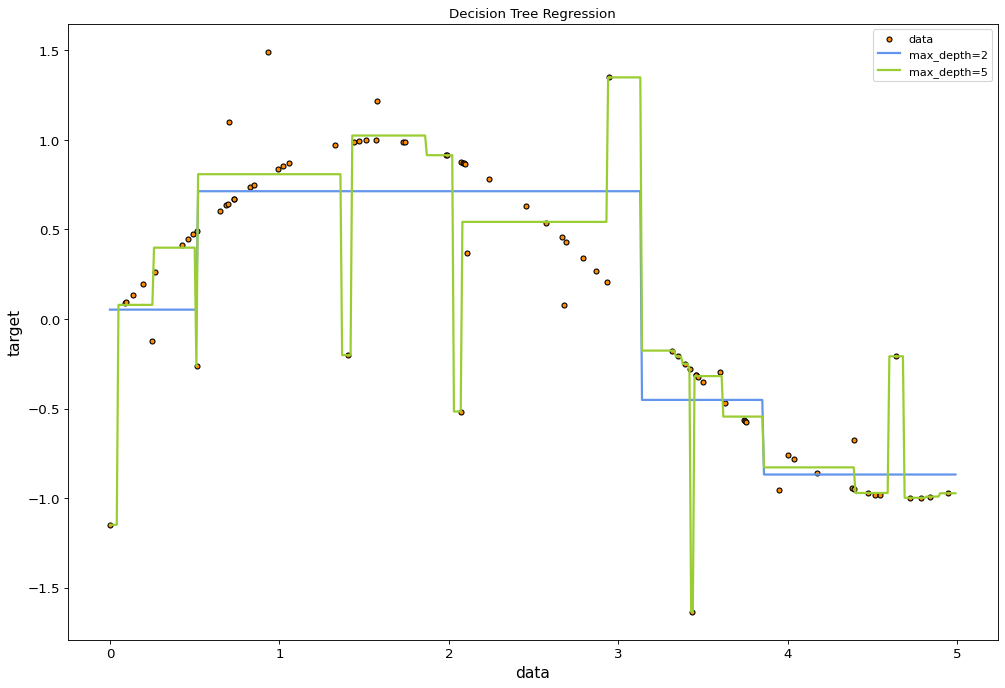

In [63]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()